<a href="https://colab.research.google.com/github/NCPalacios/NCPalacios/blob/main/HW_EDAII__Novi_Rezeki.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Setting Up 

In [ ]:
#for data manipulation 
import numpy as np
import pandas as pd

# for visualize our data
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
%matplotlib inline

#others

from sklearn import datasets
import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
df= pd.read_csv('/content/drive/MyDrive/WA_Fn-UseC_-Telco-Customer-Churn (1).csv')

In [ ]:
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

##Data Cleansing 


### Checking for the Missing Values

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Based on the initial screening, there is no missing value, which is good. 

However, some colomns have a mismatch `Dtype`. Therefore need to be converted. 

#### Correct the Data Type

Following are the mismatched Dtypes-colomns that will be converted:
- **`TotalCharges`** need to be converted from `object` to `float64` 
- **`SeniorCitizen`** need to be mapped from `int64` to `object`


In [ ]:
#Converting 'TotalCharges' from object to float64
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"],errors="coerce")

#Mapping 'SeniorCitizen' from int64 to object
df["SeniorCitizen"] = df["SeniorCitizen"].map({1:'Yes', 0:'No'})

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [ ]:
# Checking the missing data percentage
11/7043*100

0.1561834445548772

Now after the data is properly converted to all the types we need, blank space appears (" ") as null values, which amount to less than 0,2% of the total values. Therefore, it's safe to drop the missing values. 

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### Check for the Duplicated Values

In [ ]:
df.duplicated().sum()

0

The data doesn't have any duplicated values. The missing Values have been cleaned and mismatched `Dtypes` have been fixed. All good for now ^^

##Standard EDA

In [ ]:
# Split features into Numerical and Categorical
nums = df.select_dtypes(include = 'number')
cats = df.select_dtypes(include = 'object')


### Statistical Summary

####Defining the Target variable

In this EDA, we are trying figure out the relationship between churning rate and other features, such as customer demographics, type of service, and others numerical variables.
Therefore we have a binary classification problem with a slightly unbalanced target:

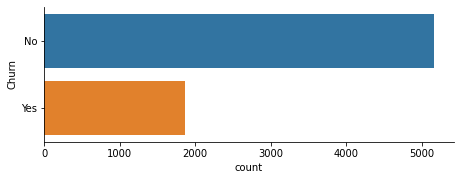

In [ ]:
ax = sns.catplot(y="Churn", kind="count", data=df, height=2.6, aspect=2.5, orient='h')

Over a quarter of customers quit using the service.

#### Numerical Features Statistical Summary

In [ ]:
nums.describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


**Analysis**

Based on the statistical summary, the mean and median of the `tenure` and `MonthlyCharges` are roughly equal. So, it's safe to assume that **the `tenure` and `MonthlyCharges` are roughly normal distributed where the mean represents the population.** 

Whereas there are **huge gaps** between the minimum values and maximum values of the `TotalCharges`,--though still reasonable, **indicates there could be outliers.** 
The median of the `TotalCharges` deviates from the mean and is relatively 
much closer to Q1, Indicating the `TotalCharges` positively skewed. 
These will be further explore through visualization and further analysis.

####Categorical Features Statistical summary

In [ ]:
cats.describe()

,customerID,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032
unique,7032,2,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,7590-VHVEG,Male,No,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,1,3549,5890,3639,4933,6352,3385,3096,3497,3087,3094,3472,2809,2781,3875,4168,2365,5163


Analysis:

- The number of male and female customers are roughly equal (**50.47%** vs **49.53%**)
- Only **16%** of customers are Senior Citizen
- **52%** of customers do not have partner
- **70%** of customers do not have dependents
- **90%** of customers use phone service 
- **48%** of customers do not use multipleline 
- **44%** of customers use Fiber optic
- **50%** of customers do not use Online Security
- **44%** of customers do not use Online Backup
- **44%** of customers do not use Device Protection
- **49%** of customers do not use Techsupport
- **40%** of customers do not use StreamingTV
- **40%** of customers do not use StreamingMovies
- Over **55%** of customers are Month-to-month
- **59%** of customers use Paperless Billing
- **34%** of customers use Electronic check
- ```customerID``` has too many unique values so it might not provide much insights nor trends. Thus, we will exclude ```customerID``` for the EDA. 

### Univariate Analysis


#### Detect the outliers using boxplot

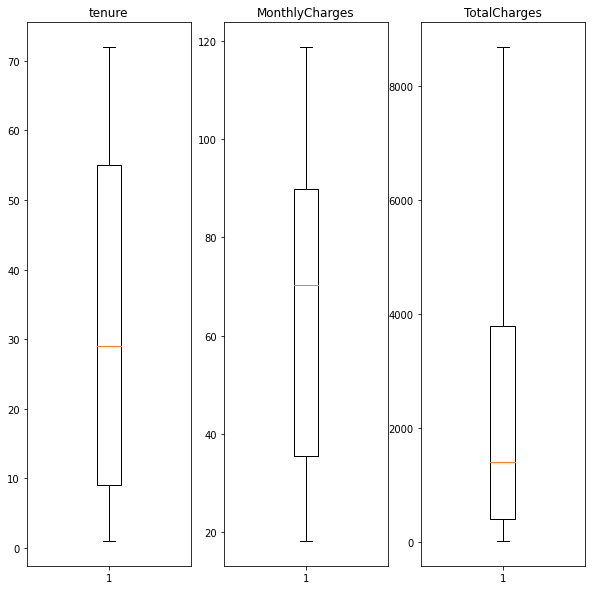

In [ ]:

fig, ax = plt.subplots(1,3, figsize=(10, 10))                      

for i, col in enumerate(nums):
    ax[i].boxplot(df[col]) 
    ax[i].set_title(col)
    

**Finding**
- The ```tenure``` is slight positively skewed as mean is greater than median

- The ```MonthlyCharges``` is negatively skewed as mean is lower than median

- The ```TotalCharges``` is positively skewed as mean is greater than median

- However, there are no outliers

**Analysis**
Since the ```TotalCharges``` is the the accumulation of ```tenure*MonthlyCharges```, with the minimum value of tenure as low as 1 and the maximum value as high as 72, the desperacy between the mean and median of the ```TotalCharges``` is natural.

####Inspect Column Distribution 


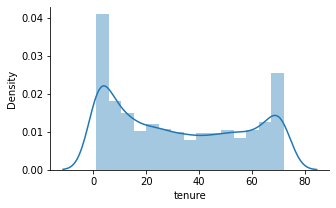

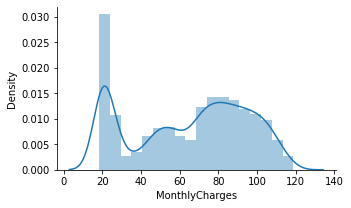

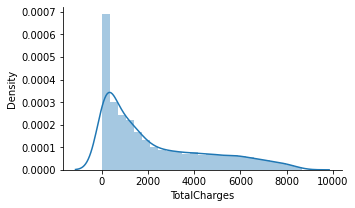

In [ ]:
def dist_plots(df):
    plt.figure(figsize=(5, 3))
    sns.distplot(df)
    sns.despine()
    plt.show()
dist_plots(df['tenure'])
dist_plots(df['MonthlyCharges'])
dist_plots(df['TotalCharges'])

**Analysis**:
- none of the Numerical features has normal distribution.
- `tenure` has the most symmetrical distribution, although it's not a bell curve and rather with spikes at the beggining and the end of the curves, almost like an inverted bell curve. Which could indicate that there is a higher chrun within few months of the service. The free trial culture might play a big role in this phenomena.
- `MonthlyCharges` has the highest density before the Q1 and after the median. Which means that the lower and higher tier products are more popular amongs the customers compare to the middle-tier products.  

These will be further investigated using the ```kdeplot``` features from seaborn, taking the Churn in the consideration (Multivariate analysis)

###Multivariate Analysis

####Numerical features

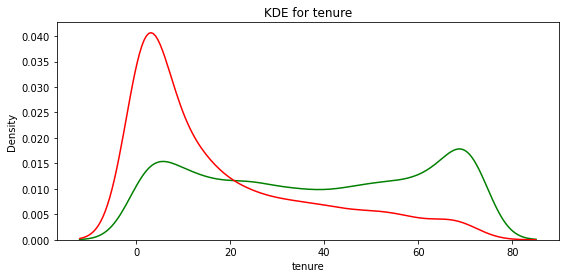

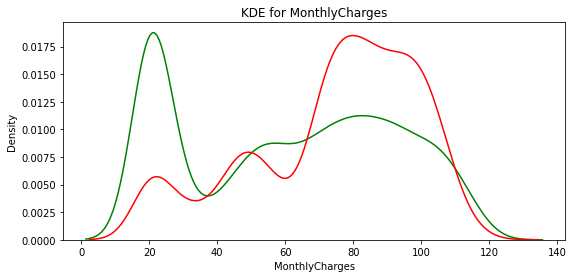

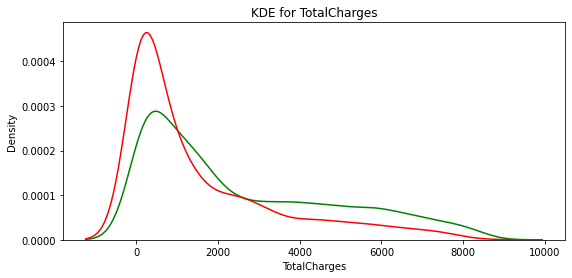

In [ ]:
def kdeplot(feature):
    plt.figure(figsize=(9, 4))
    plt.title("KDE for {}".format(feature))
    ax0 = sns.kdeplot(df[df['Churn'] == 'No'][feature].dropna(), color= 'green', label= 'Churn: No', legend=True)
    ax1 = sns.kdeplot(df[df['Churn'] == 'Yes'][feature].dropna(), color= 'red', label= 'Churn: Yes',legend=True)
kdeplot('tenure')
kdeplot('MonthlyCharges')
kdeplot('TotalCharges')

**Analysis**
- New customers are more likely to churn.
- Customers with higher `MonthlyCharges` are also more likely to churn.
- `MonthlyCharge` and `tenure` are important numerical features

#### Categorical Features
There are 16 categorcial features:
- 4 features related to customer demographics 
- 9 features related to the service
- 3 features related to paperworks

#####Customer demographics


###### Genders and Ages

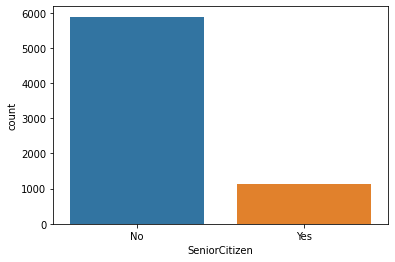

In [ ]:
sns.countplot(data=df, x='SeniorCitizen')

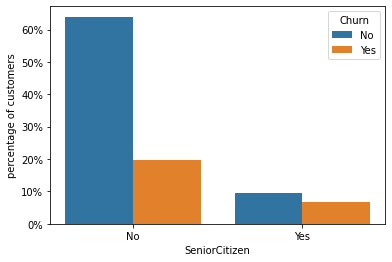

In [ ]:
def barplot_percentages(feature, orient='v', axis_name="percentage of customers"):
    ratios = pd.DataFrame()
    g = df.groupby(feature)["Churn"].value_counts().to_frame()
    g = g.rename({"Churn": axis_name}, axis=1).reset_index()
    g[axis_name] = g[axis_name]/len(df)
    if orient == 'v':
        ax = sns.barplot(x=feature, y= axis_name, hue='Churn', data=g, orient=orient)
        ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])
    else:
        ax = sns.barplot(x= axis_name, y=feature, hue='Churn', data=g, orient=orient)
        ax.set_xticklabels(['{:,.0%}'.format(x) for x in ax.get_xticks()])
    ax.plot()
barplot_percentages("SeniorCitizen")

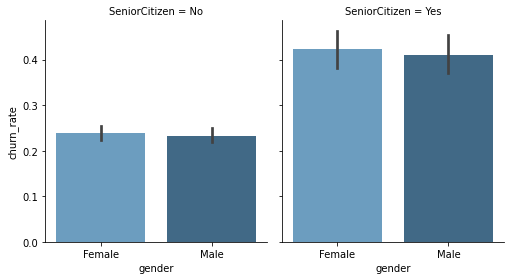

In [ ]:
df['churn_rate'] = df['Churn'].replace("No", 0).replace("Yes", 1)
g = sns.FacetGrid(df, col="SeniorCitizen", height=4, aspect=.9)
ax = g.map(sns.barplot, "gender", "churn_rate", palette = "Blues_d", order= ['Female', 'Male'])

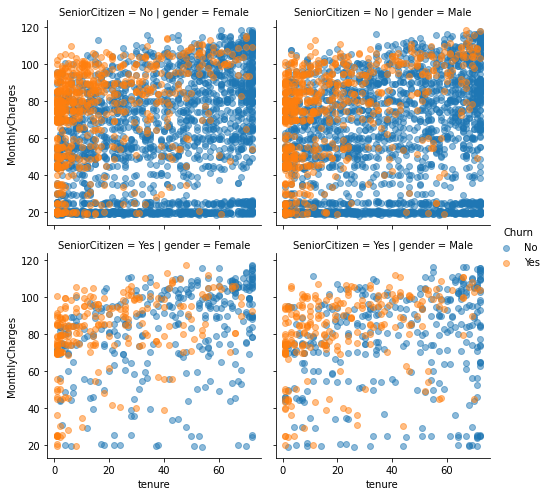

In [ ]:

Gender_Age = sns.FacetGrid(df, row='SeniorCitizen', col="gender", hue="Churn", height=3.5)
Gender_Age.map(plt.scatter, "tenure", "MonthlyCharges", alpha=0.5)
Gender_Age.add_legend();


**Analysis**
- Gender is not an indicative of Churn
- Though Senior Citizens are only 16% of customers, they have much higher churn rate at 42% compare to 23% for non-senior customers
- Base on the residual plots, there are no special corelation between age and gender categories with the main numerical values

###### Partner and Dependents

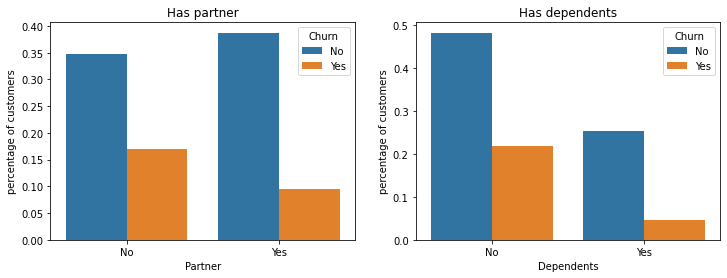

In [ ]:
fig, axis = plt.subplots(1, 2, figsize=(12,4))
axis[0].set_title("Has partner")
axis[1].set_title("Has dependents")
axis_y = "percentage of customers"
# Plot Partner column
gp_partner = df.groupby('Partner')["Churn"].value_counts()/len(df)
gp_partner = gp_partner.to_frame().rename({"Churn": axis_y}, axis=1).reset_index()
ax = sns.barplot(x='Partner', y= axis_y, hue='Churn', data=gp_partner, ax=axis[0])
# Plot Dependents column
gp_dep = df.groupby('Dependents')["Churn"].value_counts()/len(df)
gp_dep = gp_dep.to_frame().rename({"Churn": axis_y}, axis=1).reset_index()
ax = sns.barplot(x='Dependents', y= axis_y, hue='Churn', data=gp_dep, ax=axis[1])

**Analysis:**
- Customers without Partnes are more likely to churn
- Customers without Dependents are also more likely to churn 

#### Essential Services 
The essential services in the dataset is ```InternetService``` and ```MultipleLines```. In this section we will measure the relation of each individual independ variable and the Churn rate. Later, we will further analyze how these services affect the ```MonthlyCharges```.

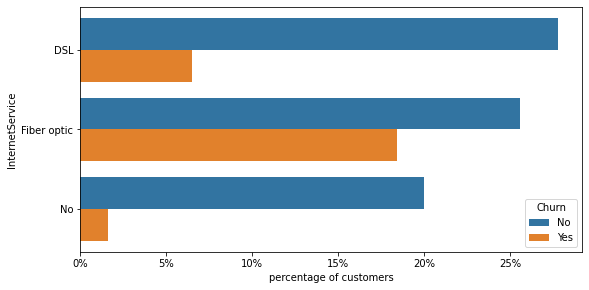

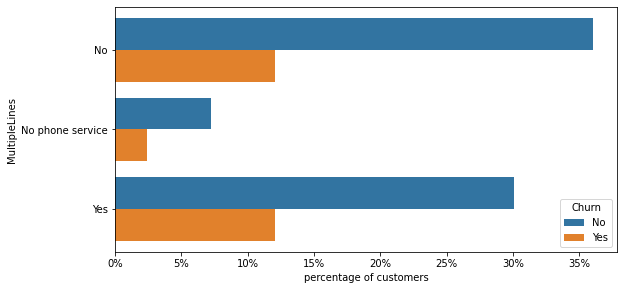

In [ ]:
plt.figure(figsize=(9, 4.5))
barplot_percentages("InternetService", orient="h")

plt.figure(figsize=(9, 4.5))
barplot_percentages("MultipleLines", orient='h')

**Analysis**
- Customers with no Internet service are less likely to Churn
- Customers with Fiber Optic are more likely to Churn than DSL 
- Only a few of customers don't have phone service
- Churn rate between customers with and without multiple lines are roughly equal

Now, let see how this affect Monthly charges:

##### MultipleLines

<Figure size 576x216 with 0 Axes>

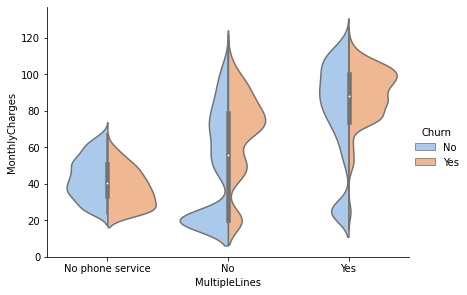

In [ ]:
plt.figure(figsize=(8, 3))
ax = sns.catplot(x="MultipleLines", y="MonthlyCharges", hue="Churn", kind="violin",
                 split=True, palette="pastel", data=df, height=4.2, aspect=1.4)

**Analysis**
- Customers with no phone service in average pay lower Monthly Charges than the mayority of Customers with phone services.
- The mayority Customers with MultipleLines Service in average pay the highest  Monthly Charges.

##### Internet Service

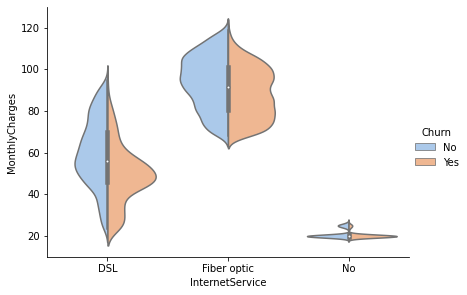

In [ ]:
ax = sns.catplot(x="InternetService", y="MonthlyCharges", hue="Churn", kind="violin",
                 split=True, palette="pastel", data=df, height=4.2, aspect=1.4);

**Analysis**
- Customers with Fiber Opptic pay relatively higher ```MonthlyCharges``` compare to Customers with DSL, and absolutely higher ```MonthlyCharges```than Customers with no Internet service 
- Interestingly, Customers with DSL and higher ```MonthlyCharges``` are less likely to churn. Why though?


#### Aditional services

There are six additional services for customers with internet:

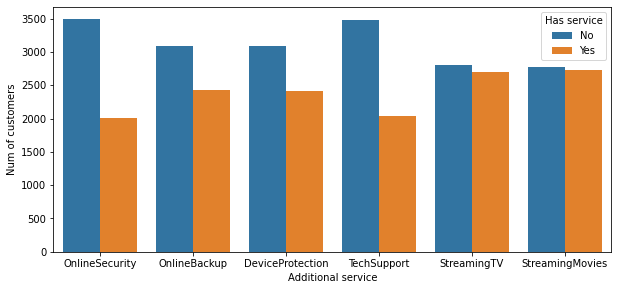

In [ ]:
# Total number of customers for each additional service 
cols = ["OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies"]
df1 = pd.melt(df[df["InternetService"] != "No"][cols]).rename({'value': 'Has service'}, axis=1)
plt.figure(figsize=(10, 4.5))
ax = sns.countplot(data=df1, x='variable', hue='Has service')
ax.set(xlabel='Additional service', ylabel='Num of customers')
plt.show()

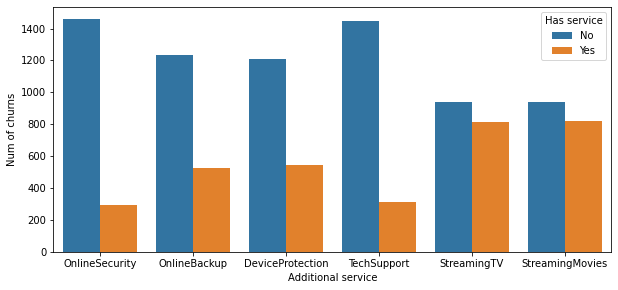

In [ ]:
# the number of clients that churn for each additional service 
plt.figure(figsize=(10, 4.5))
df1 = df[(df.InternetService != "No") & (df.Churn == "Yes")]
df1 = pd.melt(df1[cols]).rename({'value': 'Has service'}, axis=1)
ax = sns.countplot(data=df1, x='variable', hue='Has service', hue_order=['No', 'Yes'])
ax.set(xlabel='Additional service', ylabel='Num of churns')
plt.show()

**Analysis**
- Customers with no OnlineSecurity, OnlineBackup, DeviceProtection, and TechSUpport are more likely to churn.
- streaming services are not indicative of churn

#### Contract and Payment

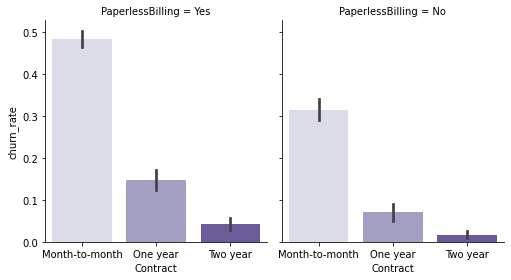

In [ ]:
g = sns.FacetGrid(df, col="PaperlessBilling", height=4, aspect=.9)
ax = g.map(sns.barplot, "Contract", "churn_rate", palette = "Purples", order= ['Month-to-month', 'One year', 'Two year'])

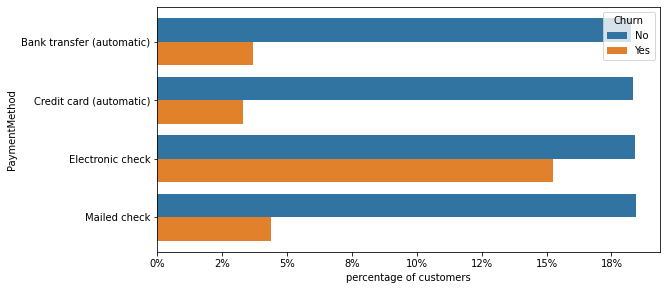

In [ ]:
plt.figure(figsize=(9, 4.5))
barplot_percentages("PaymentMethod", orient='h')

i**Analysis**
- Customers with Paperless Billing **at least are 30% more likely to churn**
- Short-term contacts have higher churning rate both in paper and paperless billing
- Most popular payment method is Electronic check with around **34%** of customers. This method also has the highest churn rate.
- Automatic payment methods have the lowest chrun rate. 
 
One thing that we know about human nature is that we always avoid pain. 
 
Longer-term contact has the lowest churn rate perhaps because usually there is some kind of "fine" if the customer quits the service before the end-date, this is a pain point that usually customers try to avoid, as breaking a contract will cost them more money than using it up until the end date. 
 
Both Paperless and Electronic check have the highest churn rate, probably because doing paperwork to cancel a service is painful while canceling paperless electronic service is seamless and painless. 
But what is more painless than a seamless transaction: the one that can take care of themselves. This is probably why the automatic payment methods have lower churn rate. When the payment is done automatically, it removes all the barriers and hustle on the side of the customers, creating a painless shopping experience because they don’t even realize that they are spending money. And in turn, painless shopping encourages higher (mindless) spending. 
Good for business. Not so much for customers.
 
 
Now, let see its correlation with the monthly charges


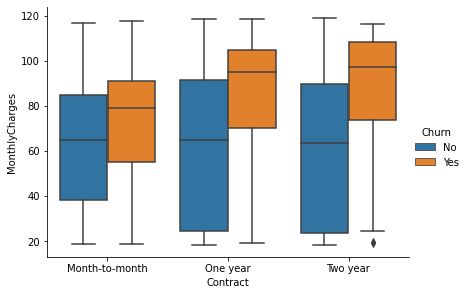

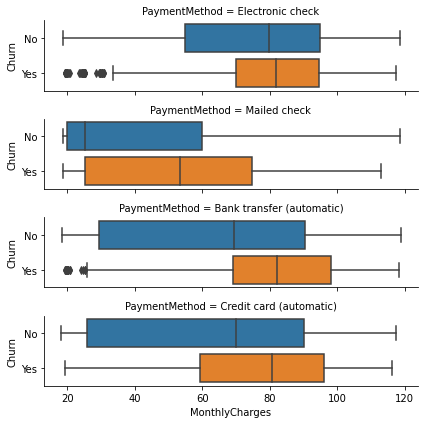

In [ ]:
ax = sns.catplot(x="Contract", y="MonthlyCharges", hue="Churn", kind="box", data=df, height=4.2, aspect=1.4)
ax = sns.catplot(y="Churn", x="MonthlyCharges", row="PaymentMethod", kind="box", data=df, height=1.5, aspect=4, orient='h')


**Analysis**
- In the long term, customers are more affected by the higher monthly charges - - Customers who churn tend to have higher monthly charges.
- Mail check charge the lowest fee compared to other payment methods. 
- There is no significant difference between the customer who churns and who doesn’t in the mail check methods


### Heat Map

The correlation between features

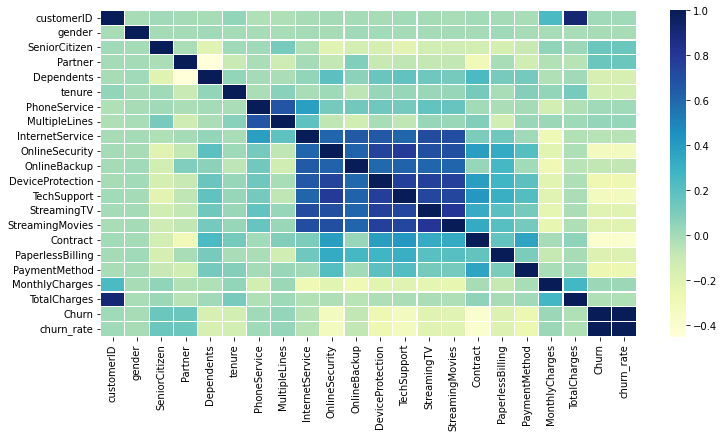

In [ ]:
plt.figure(figsize=(12, 6))
corr = df.apply(lambda x: pd.factorize(x)[0]).corr()
ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, 
                 linewidths=.2, cmap="YlGnBu")


**Analysis**
 
- There are strong positive correlations amongst services.  
- In general, the more the additional services a customer has, the less likely a customer will churn. 
- The longer the contract, the less likely a customer will churn. 
- Customer demographic, such as age, partners and dependants, has mild negative correlations with the churn rate. --Dependants and partner leads to lower churn.



##Deep-Dive

##### What are 10 most popular MonthlyCharges
- groupby ```MonthlyCharges```
- take the count of ```customerID```
- Do appropriate sorting and truncation.
- Visualize it

In [ ]:
# 10 most popular MonthlyCharges
top10_MC = (df
            .groupby('MonthlyCharges')
            .agg(num_cus=('customerID','count'))
            .reset_index()
            .sort_values('num_cus',ascending=False)
            .head(10)
            )
top10_MC

,MonthlyCharges,num_cus
30,20.05,61
28,19.95,44
27,19.90,44
26,19.85,44
22,19.65,43
29,20.00,42
23,19.70,42
32,20.15,40
20,19.55,40
24,19.75,39


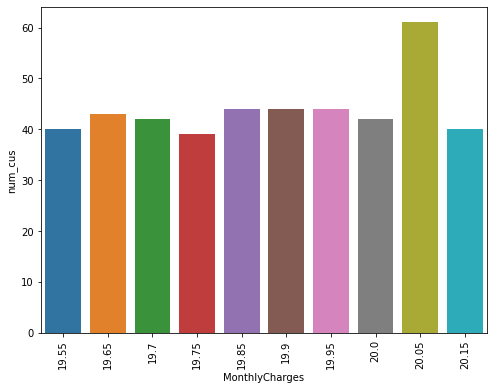

In [ ]:
plt.figure(figsize=(8,6))
sns.barplot(data=top10_MC, x='MonthlyCharges', y='num_cus')
plt.xticks(rotation=90)
plt.show()

Charges over 19.55 up to 20.15 are the most popular

##### What are 10 least popular MonthlyCharges
- groupby ```MonthlyCharges```
- take the count of ```customerID```
- Do appropriate sorting and truncation.

In [ ]:
# 10 most popular MonthlyCharges
top10_MC = (df
            .groupby('MonthlyCharges')
            .agg(num_cus=('customerID','count'))
            .reset_index()
            .sort_values('num_cus',ascending=True)
            .head(10)
            )
top10_MC

,MonthlyCharges,num_cus
0,18.25,1
680,68.30,1
677,68.10,1
676,68.05,1
674,67.85,1
672,67.75,1
671,67.70,1
670,67.65,1
669,67.60,1
668,67.50,1


In [ ]:
df.head(1)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,churn_rate
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0


In [ ]:
# Our Big spenders
BS = (df
            .groupby('Dependents')
            .agg(TTS=('TotalCharges','sum'))
            .reset_index()
            .sort_values('TTS',ascending=False)
            .head(10)
            )
BS

,Dependents,TTS
0,No,10791969.75
1,Yes,5264198.95
